In [1]:
import pandas as pd

In [2]:
regular_df = pd.read_csv('./results_fair/reco_group.csv', index_col=0)
# regular_df = pd.read_csv('.results_fair/reco_group.csv', index_col=0)

In [3]:
sf = regular_df[regular_df['gender'] == 'F']['count'].sum()
sm = regular_df[regular_df['gender'] == 'M']['count'].sum()

In [4]:
assert sf + sm == regular_df['count'].sum()

In [5]:
def get_prob(row):
    if row['gender'] == 'F':
        return row['count']*100/sf
    return row['count']*100/sm

In [6]:
regular_df['fraction'] = regular_df.apply(lambda x : get_prob(x), axis=1)

In [7]:
regular_df

,gender,genre,count,fraction
0,F,Action,454,5.146809
1,F,Adventure,298,3.378302
2,F,Animation,82,0.929600
3,F,Comedy,1406,15.939236
4,F,Crime,402,4.557306
5,F,Documentary,259,2.936175
6,F,Drama,2885,32.706042
7,F,Fantasy,36,0.408117
8,F,Film-Noir,216,2.448702
9,F,Horror,155,1.757170


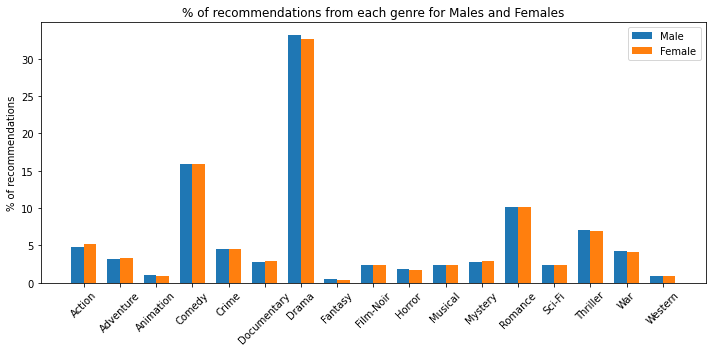

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = list(regular_df['genre'].unique())#['G1', 'G2', 'G3', 'G4', 'G5']
men_means = regular_df[regular_df['gender']=='M']['fraction']#[20, 34, 30, 35, 27]
women_means = regular_df[regular_df['gender']=='F']['fraction']#[25, 32, 34, 20, 25]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10,5))
rects1 = ax.bar(x - width/2, men_means, width, label='Male')
rects2 = ax.bar(x + width/2, women_means, width, label='Female')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% of recommendations')
ax.set_title('% of recommendations from each genre for Males and Females')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation = 45)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


# autolabel(rects1)
# autolabel(rects2)

fig.tight_layout()
plt.savefig('./results_fair/graphsage.png')
plt.show()